In [119]:
!pip3 install essentia

In [120]:
!pip3 install madmom

In [121]:
!pip3 install mir_eval

The section below is all path dependent

In [122]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [123]:
import madmom

In [124]:
!ls 'drive/MyDrive/Bass'

 001_beats.csv
 001_beats.gsheet
 002_beats.csv
 abesser_music
 bassunet.py
 data
 data_old
 deviations
 EnergyChecker_AllStems.ipynb
 EnergyChecker_Student_TrinityBillieJean.ipynb
 grades
 HistogramTestBillieJean.ipynb
 HistogramTestBrown.ipynb
 HistogramTestJust.ipynb
 HistogramTestRoad.ipynb
 HistogramTestWOTM.ipynb
 HistogramTestYellow.ipynb
 IEC_billieJean.csv
 __init__.py
 LICENSE
 music
 notebooks_june
 notebooks_may
 pooling.py
 __pycache__
 README.md
 SG_Student_TrinityWOTM.ipynb
 SOP_Student_TrinityBillieJean.ipynb
 statistics
 Statistics_IEC_billieJean.csv
 StudentStatistics_BillieJean.csv
 StudentStatisticsInput.csv
 tcl_annotate
 Test_Student_ONSET_TrinityYellow.ipynb
'Thesis Review Meeting.gdoc'
 txt


In [125]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [126]:
import mir_eval
from mir_eval import *

In [127]:
!ls drive/MyDrive/Bass/data/yellow/  #drive/MyDrive/Bass/statistics

StudentStatistics_yellow.csv  yellow_devs_student4.csv
yellow_devs_student0.csv      yellow_devs_student5.csv
yellow_devs_student1.csv      yellow_devs_student6.csv
yellow_devs_student2.csv      yellow_devs_student7.csv
yellow_devs_student3.csv      yellow_devs_student8.csv


In [128]:
statsPath = 'drive/MyDrive/Bass/data/yellow/StudentStatistics_yellow.csv'
statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [129]:
print(df_all)
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

   Student  precision  recall  ...  soundQualityMark  volumeControlMark   finalMark
0        0      0.985   1.000  ...             100.0              100.0         5.0
1        1      0.044   0.046  ...              63.0               63.0         1.8
2        2      0.380   0.390  ...              76.5               76.5         3.6
3        3      0.103   0.108  ...              63.0               76.5         2.7
4        4      0.594   0.585  ...              76.5               49.5         1.8
5        5      0.508   0.497  ...              90.0               90.0         4.5
6        6      0.198   0.195  ...              76.5               76.5         3.6
7        7      0.181   0.190  ...              76.5               76.5         3.6
8        8      0.122   0.231  ...              63.0               63.0         1.8

[9 rows x 16 columns]


In [130]:
print(type(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)
df_all

<class 'list'>
[-0.008, -0.004, -0.008, 0.003, -0.001, 0.006, -0.004]


,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark
0,0,0.985,1.000,0.992,0.000,0.000,0.000,0.000,0.000,0.000,100.0,100.0,100.0,100.0,100.0,5.0
1,1,0.044,0.046,0.045,0.013,-0.008,0.014,0.067,-0.056,0.101,49.5,76.5,49.5,63.0,63.0,1.8
2,2,0.380,0.390,0.385,0.011,-0.004,0.013,0.038,-0.029,0.101,76.5,63.0,76.5,76.5,76.5,3.6
3,3,0.103,0.108,0.105,0.010,-0.008,0.012,0.059,-0.059,0.112,49.5,63.0,63.0,63.0,76.5,2.7
4,4,0.594,0.585,0.589,0.009,-0.001,0.011,0.028,0.000,0.070,76.5,76.5,76.5,76.5,49.5,1.8
5,5,0.508,0.497,0.503,0.010,0.003,0.012,0.026,0.015,0.056,90.0,90.0,90.0,90.0,90.0,4.5
6,6,0.198,0.195,0.196,0.010,0.006,0.012,0.030,0.022,0.041,76.5,63.0,63.0,76.5,76.5,3.6
7,7,0.181,0.190,0.185,0.010,-0.004,0.012,0.096,-0.023,0.147,76.5,90.0,90.0,76.5,76.5,3.6
8,8,0.122,0.231,0.160,0.010,-0.002,0.012,0.193,-0.187,0.287,49.5,49.5,76.5,63.0,63.0,1.8


In [131]:
index = df_all.index
number_of_rows = len(index)
print(number_of_rows)


9


Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
0.0
ok3


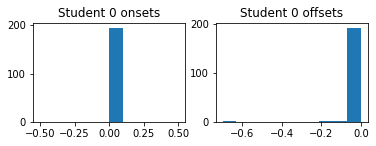

Onset Grade =  49.5 	 Offset Grade =  76.5


Articulation Grade =  49.5 Sound Q Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  1.8
ok1
-0.007777777777777019
ok3


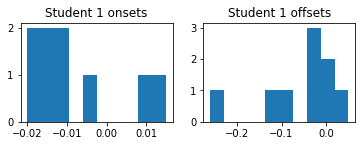

Onset Grade =  76.5 	 Offset Grade =  63.0


Articulation Grade =  76.5 Sound Q Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
ok1
-0.004078947368420848
ok3


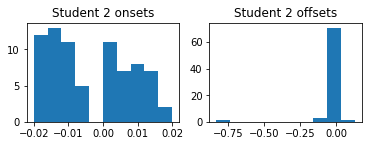

Onset Grade =  49.5 	 Offset Grade =  63.0


Articulation Grade =  63.0 Sound Q Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  2.7
ok1
-0.007619047619047118
ok3


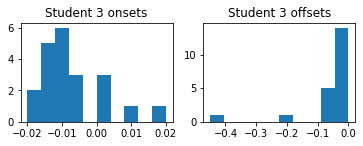

Onset Grade =  76.5 	 Offset Grade =  76.5


Articulation Grade =  76.5 Sound Q Grade =  76.5 Volume Control Grade =  49.5
Final Mark =  1.8
ok1
-0.0007894736842103067
ok3


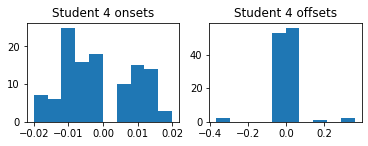

Onset Grade =  90.0 	 Offset Grade =  90.0


Articulation Grade =  90.0 Sound Q Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
ok1
0.0029896907216491095
ok3


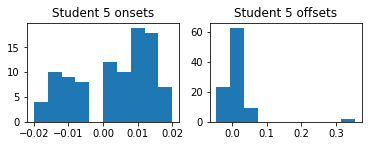

Onset Grade =  76.5 	 Offset Grade =  63.0


Articulation Grade =  63.0 Sound Q Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
ok1
0.005921052631579171
ok3


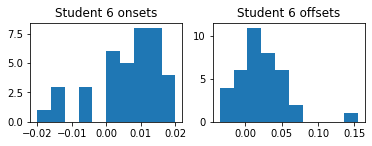

Onset Grade =  76.5 	 Offset Grade =  90.0


Articulation Grade =  90.0 Sound Q Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
ok1
-0.0036486486486481144
ok3


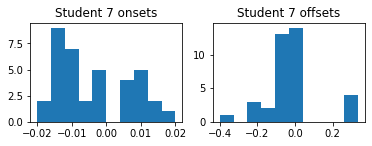

Onset Grade =  49.5 	 Offset Grade =  49.5


Articulation Grade =  76.5 Sound Q Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  1.8
ok1
-0.002333333333332711
ok3


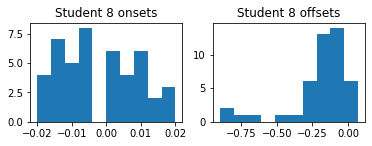

In [132]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<number_of_rows:
   sdeviatePath = 'drive/MyDrive/Bass/data/yellow/yellow_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

In [133]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
  header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
		 "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]

  studentStatisticsArray= []
  #with open('drive/MyDrive/Bass/data/yellow/StudentStatistics_yellow.csv', 'w', encoding='UTF8') as f:
  #dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatistics_yellow.csv')


  idx = df.index

  number_of_rows = len(idx)

  studentStatistics = []
  onset_X = []  # Martis mark
  onset_amean = []
  onset_mean = []
  onset_std= []

  duration_X = [] # Martis mark
  duration_amean = []
  duration_mean = []
  duration_std= []
  list0 = df["onsetMark"].tolist()  
  list1 = df[" DurationMark"].tolist()  
  list2 = df[" articulationMark "].tolist()  
  list3 = df["soundQualityMark"].tolist()  
  list4 = df["volumeControlMark"].tolist()  
  list5 = df[" finalMark"].tolist()  

  listp = df["precision"].tolist()  
  listr = df["recall"].tolist()  
  listf = df["f_measure_value"].tolist()  
 
  k=0

  for k in range(number_of_rows):
    print("==================BEGIN OF STUDENT GRADE =================")
    studentStatistics.append(str(k+1))
    student_stats1 = [] # onsets
    student_stats2 = [] # durations

    plt.subplot(2,2,1)
    a = np.array(deviationsArray1[k])
    onset_m, onset_s = mean(a), sqrt(mean(a*a))
    onset_am= mean(abs(a))
    onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
    title =   "Student " + str(k)+ title_text1

    onset_X.append( list0[k])  # Martis mark

    onset_mean.append(onset_m)
    onset_amean.append(onset_am)
    onset_std.append(onset_s)

    plt.title(title)
    plt.figure(1, figsize=(9.5, 6))
    plt.hist(a)

    plt.subplot(2,2,2)
    a = np.array(deviationsArray2[k])
    duration_m, duration_s = mean(a), sqrt(mean(a*a))
    duration_am= mean(abs(a))
    duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
    title =   "Student " + str(k)+ title_text2
    duration_X.append( list1[k])  # Martis mark
    duration_mean.append(duration_m)
    duration_amean.append(duration_am)
    duration_std.append(duration_s)

    plt.title(title)
    plt.figure(1, figsize=(9.5, 6))
    plt.hist(a)

    plt.show()
    print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
    print(onset_summary)
    print(duration_summary)
    print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k], "Volume Control Grade = ", list4[k])
    print("Final Mark = ", list5[k])
    studentStatistics = []
    studentStatistics.append(str(k+1))
    studentStatistics.append(round(listp[k],3))
    print("Precision = ", round(listp[k],3))
    studentStatistics.append(round(listr[k],3))
    studentStatistics.append(round(listf[k],3))
    studentStatistics.append(round(onset_am,3))
    studentStatistics.append(round(onset_m,3))
    studentStatistics.append(round(onset_s,3))   
    studentStatistics.append(round(duration_am,3))                   
    studentStatistics.append(round(duration_m,3)) 
    studentStatistics.append(round(duration_s,3))   
    studentStatistics.append(list0[k])
    studentStatistics.append(list1[k])
    studentStatistics.append(list2[k])
    studentStatistics.append(list3[k])
    studentStatistics.append(list4[k])
    studentStatistics.append(list5[k])
	  # write the data
	  #writer.writerow(studentStatistics)
    print("==================END OF STUDENT GRADE =================")
    studentStatisticsArray.append(studentStatistics)
    
  return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade

==================BEGIN OF STUDENT GRADE =================


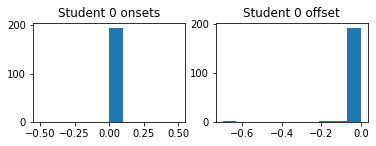

Onset Grade =  100.0 	 Duration Grade =  100.0
Onset ABS  Mean: 0.000000,Onset Mean: 0.000000, Dev. from 0: 0.000000
Offset Mean: -0.004949, Dev. from 0: 0.051923
Articulation Grade =  100.0 Sound Control Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
Precision =  0.985
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


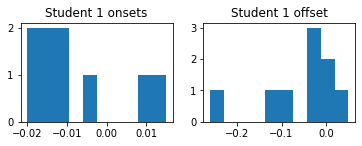

Onset Grade =  49.5 	 Duration Grade =  76.5
Onset ABS  Mean: 0.013333,Onset Mean: -0.007778, Dev. from 0: 0.014142
Offset Mean: -0.055556, Dev. from 0: 0.101434
Articulation Grade =  49.5 Sound Control Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  1.8
Precision =  0.044
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


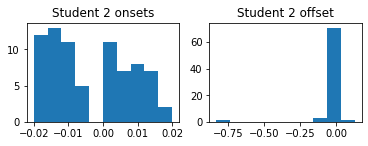

Onset Grade =  76.5 	 Duration Grade =  63.0
Onset ABS  Mean: 0.010921,Onset Mean: -0.004079, Dev. from 0: 0.012722
Offset Mean: -0.028618, Dev. from 0: 0.101296
Articulation Grade =  76.5 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
Precision =  0.38
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


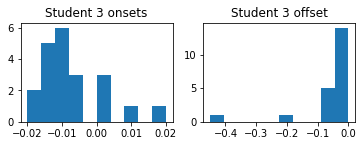

Onset Grade =  49.5 	 Duration Grade =  63.0
Onset ABS  Mean: 0.010476,Onset Mean: -0.007619, Dev. from 0: 0.012150
Offset Mean: -0.058571, Dev. from 0: 0.111718
Articulation Grade =  63.0 Sound Control Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  2.7
Precision =  0.103
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


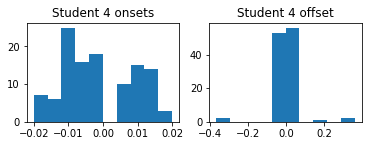

Onset Grade =  76.5 	 Duration Grade =  76.5
Onset ABS  Mean: 0.009035,Onset Mean: -0.000789, Dev. from 0: 0.010740
Offset Mean: 0.000439, Dev. from 0: 0.069981
Articulation Grade =  76.5 Sound Control Grade =  76.5 Volume Control Grade =  49.5
Final Mark =  1.8
Precision =  0.594
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


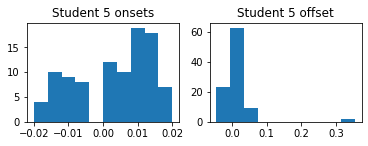

Onset Grade =  90.0 	 Duration Grade =  90.0
Onset ABS  Mean: 0.010412,Onset Mean: 0.002990, Dev. from 0: 0.011992
Offset Mean: 0.014845, Dev. from 0: 0.055124
Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
Precision =  0.508
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


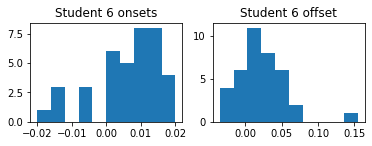

Onset Grade =  76.5 	 Duration Grade =  63.0
Onset ABS  Mean: 0.010132,Onset Mean: 0.005921, Dev. from 0: 0.012003
Offset Mean: 0.022368, Dev. from 0: 0.040669
Articulation Grade =  63.0 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
Precision =  0.198
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


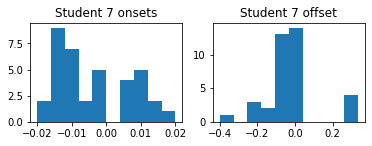

Onset Grade =  76.5 	 Duration Grade =  90.0
Onset ABS  Mean: 0.010135,Onset Mean: -0.003649, Dev. from 0: 0.011654
Offset Mean: -0.022027, Dev. from 0: 0.144650
Articulation Grade =  90.0 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
Precision =  0.181
==================END OF STUDENT GRADE =================
==================BEGIN OF STUDENT GRADE =================


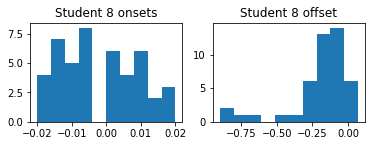

Onset Grade =  49.5 	 Duration Grade =  49.5
Onset ABS  Mean: 0.009889,Onset Mean: -0.002333, Dev. from 0: 0.011762
Offset Mean: -0.187111, Dev. from 0: 0.286888
Articulation Grade =  76.5 Sound Control Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  1.8
Precision =  0.122
==================END OF STUDENT GRADE =================


In [134]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [135]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark
0,0,0.985,1.000,0.992,0.000,0.000,0.000,0.000,0.000,0.000,100.0,100.0,100.0,100.0,100.0,5.0
1,1,0.044,0.046,0.045,0.013,-0.008,0.014,0.067,-0.056,0.101,49.5,76.5,49.5,63.0,63.0,1.8
2,2,0.380,0.390,0.385,0.011,-0.004,0.013,0.038,-0.029,0.101,76.5,63.0,76.5,76.5,76.5,3.6
3,3,0.103,0.108,0.105,0.010,-0.008,0.012,0.059,-0.059,0.112,49.5,63.0,63.0,63.0,76.5,2.7
4,4,0.594,0.585,0.589,0.009,-0.001,0.011,0.028,0.000,0.070,76.5,76.5,76.5,76.5,49.5,1.8
5,5,0.508,0.497,0.503,0.010,0.003,0.012,0.026,0.015,0.056,90.0,90.0,90.0,90.0,90.0,4.5
6,6,0.198,0.195,0.196,0.010,0.006,0.012,0.030,0.022,0.041,76.5,63.0,63.0,76.5,76.5,3.6
7,7,0.181,0.190,0.185,0.010,-0.004,0.012,0.096,-0.023,0.147,76.5,90.0,90.0,76.5,76.5,3.6
8,8,0.122,0.231,0.160,0.010,-0.002,0.012,0.193,-0.187,0.287,49.5,49.5,76.5,63.0,63.0,1.8


In [149]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   




[100.0, 49.5, 76.5, 49.5, 76.5, 90.0, 76.5, 76.5, 49.5]


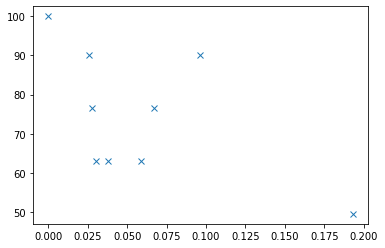

In [163]:

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)

plt.plot(Duration_amean_list,Duration_grade_list, 'x')
plt.show()

# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [138]:
import pandas as pd
#sonset_deviations,soffset_deviations

Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
-9.2224652212578e-06
ok3


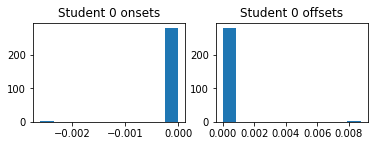

In [139]:
deviatePath = 'drive/MyDrive/Bass/deviations/billieJean_iec_stem.csv'
dff = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = dff["onset dev"]

offset_dev_list = dff["offset dev"] 
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",df_all,0)

In [ ]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [ ]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [145]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/yellow/StudentStatistics_yellow.csv')
header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]

In [ ]:
dataset

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value','Onset Mean']]#,]]
y=array(dataset['onsetMark'])

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

   Actual  Predicted
0    76.5  60.924392
1    76.5  69.760548
2    49.5  47.442291
Mean Absolute Error: 8.124256376364746
Root Mean Squared Error: 9.870054863454023


In [ ]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   
print(X_test["precision"].tolist())
print( y_test)


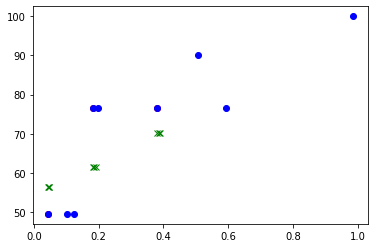

In [153]:
#X_train, X_test, y_train, y_test

plt.plot(X_test,y_pred, 'x', color='green')
plt.plot(onset_precision_list,onset_grade_list, 'o',color='blue')

plt.scatter(X_test["precision"].tolist(), y_test,  color='red')
plt.show()

In [ ]:
dataset

In [164]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['precision','recall','f_measure_value','Duration ABS Mean']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


   Actual  Predicted
0    90.0  79.759418
1    63.0  78.295147
2    76.5  66.128248
Mean Absolute Error: 11.969160469391525
Root Mean Squared Error: 12.19814590709887


In [ ]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
dataset

In [157]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0     3.6  -0.265812
1     3.6  13.608101
2     1.8   6.140306
Mean Absolute Error: 6.071406306038938
Root Mean Squared Error: 6.681936826144514
